<a href="https://colab.research.google.com/github/Gajalakshmisubramani/goldpriceprediction/blob/main/goldprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Unnamed: 0        Close         Volume         Open         High  \
count  2511.000000  2511.000000    2511.000000  2511.000000  2511.000000   
mean   1260.792911  1498.726085  185970.770609  1498.725528  1508.451454   
std     729.262879   298.824811   97600.769382   299.118187   301.262244   
min       0.000000  1049.600000       1.000000  1051.500000  1062.700000   
25%     630.500000  1249.850000  126693.500000  1249.500000  1257.300000   
50%    1259.000000  1332.800000  175421.000000  1334.000000  1342.400000   
75%    1888.500000  1805.850000  234832.000000  1805.600000  1815.450000   
max    2532.000000  2093.100000  787217.000000  2094.400000  2098.200000   

               Low  
count  2511.000000  
mean   1488.869932  
std     296.417703  
min    1045.400000  
25%    1242.350000  
50%    1326.600000  
75%    1793.050000  
max    2074.600000  


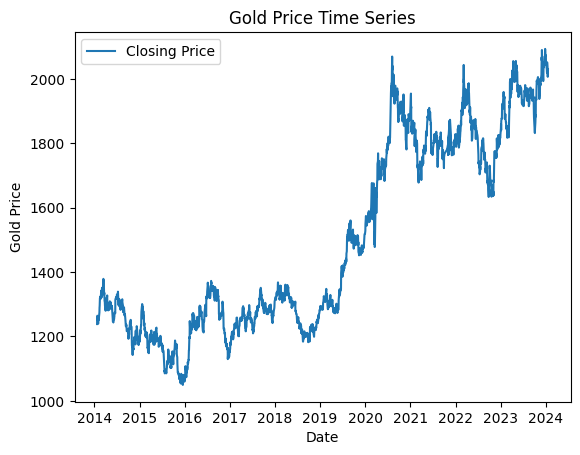

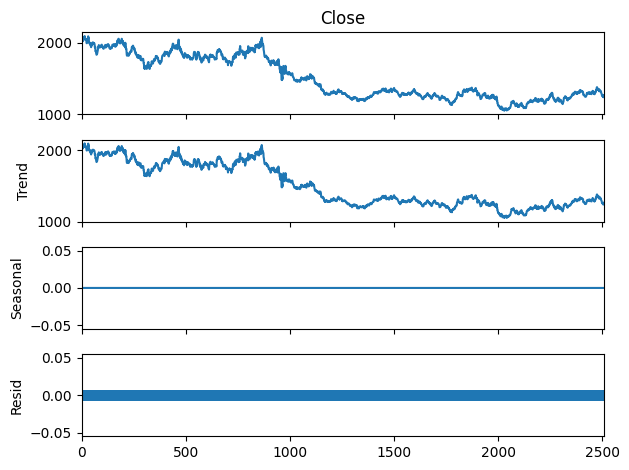

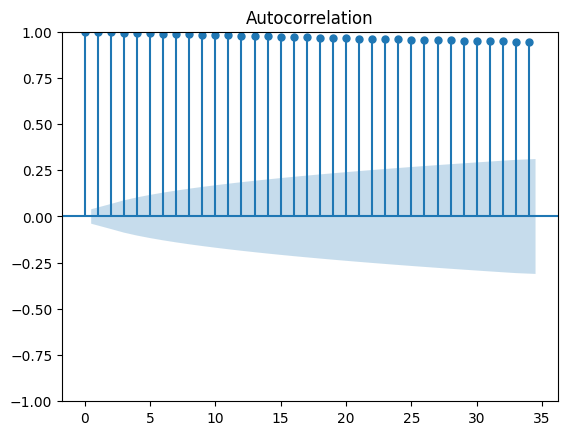

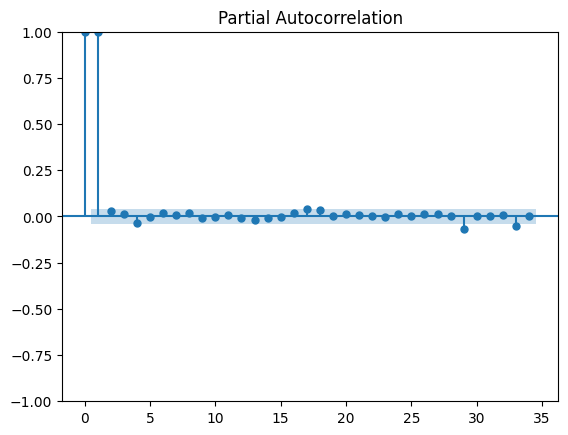

Mean Absolute Error: 230.06400162088156
Mean Squared Error: 72109.08540723959
Root Mean Squared Error: 268.53134902137515


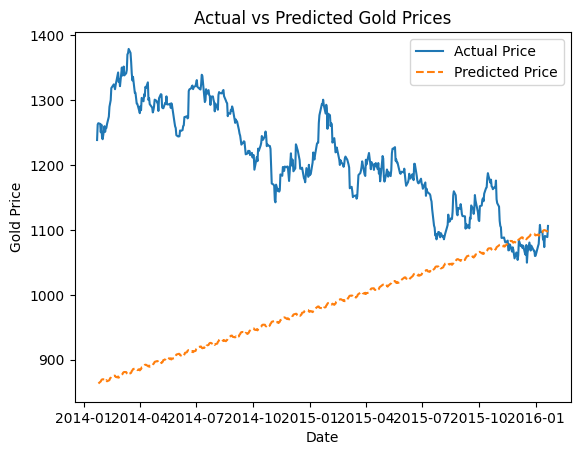

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset from a file
file_path = '/content/drive/MyDrive/goldstock.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Explore basic statistics and distributions
print(df.describe())

# Time Series Analysis
# Create time series visualizations
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Time Series')
plt.legend()
plt.show()

# Decompose time series into trend, seasonality, and residual components
result = seasonal_decompose(df['Close'], model='additive', period=1)
result.plot()
plt.show()

# Autocorrelation and partial autocorrelation functions
plot_acf(df['Close'])
plot_pacf(df['Close'])
plt.show()

# Advanced Modeling
# Split the dataset into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Implement forecasting models (e.g., SARIMAX)
# Ensure that seasonal_order[3] (seasonal periodicity) is greater than 1
# Adjust the order and seasonal_order parameters based on your data characteristics
model_sarimax = SARIMAX(train['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results = model_sarimax.fit(disp=False)
sarimax_forecast = sarimax_results.get_forecast(steps=len(test))

# Evaluate model performance
mae = mean_absolute_error(test['Close'], sarimax_forecast.predicted_mean)
mse = mean_squared_error(test['Close'], sarimax_forecast.predicted_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Visualization of actual vs predicted values
plt.plot(test['Date'], test['Close'], label='Actual Price')
plt.plot(test['Date'], sarimax_forecast.predicted_mean, label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
